In [10]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from dolfin import *
from mshr import *

parameters['reorder_dofs_serial'] = False
parameters['allow_extrapolation'] = True

## Solve Heat equation on a disk

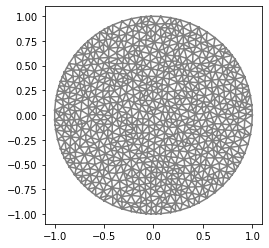

In [11]:
domain = Circle(Point(.0,.0), 1)
disk_mesh = generate_mesh(domain, 20)
plot(disk_mesh)

In [26]:
FS_disk = FunctionSpace(disk_mesh, 'Lagrange', 1)

def disk_boundary(x, on_boundary):
    x,y = x[0], x[1]
    return on_boundary and near(np.sqrt(x**2 + y**2), 1, 5e-2)

BC_disk = DirichletBC(FS_disk, Constant(1), disk_boundary)
u = TrialFunction(FS_disk)
v = TestFunction(FS_disk)
left_integrand = inner(nabla_grad(u), nabla_grad(v)) * dx
f =  Expression("x[0]*x[0]/2 + x[1]*x[1]", degree=1)
right_integrand = f*v*dx


In [27]:
#set up linear algebra problem
A = assemble(left_integrand)
b = assemble(right_integrand)
BC_disk.apply(A,b)
disk_sol = Function(FS_disk) # placeholder for solution
solve(A, disk_sol.vector(), b)

1

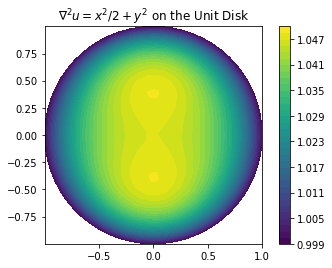

In [33]:
p = plot(disk_sol)
plt.title(r'$∇ ^2 u = x^2/2+y^2$ on the Unit Disk')
plt.colorbar(p)
plt.show()

## Solve on Perforated Disk

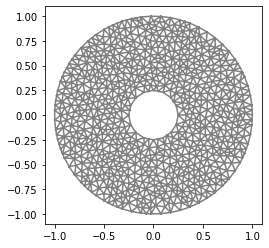

In [34]:
r_outer = 1
r_inner = 0.25
wedge = Circle(Point(.0, .0), r_outer) - Circle(Point(.0, .0), r_inner)
wedge_mesh = generate_mesh(wedge, 20)
plot(wedge_mesh)

In [47]:
def inner_boundary(x, on_boundary):
    x,y = x[0], x[1]
    return on_boundary and near(np.sqrt(x**2 + y**2),r_inner, 5e-2)

def outer_boundary(x, on_boundary):
    x,y = x[0], x[1]
    return on_boundary and near(np.sqrt(x**2 + y**2),r_outer, 5e-2)


In [54]:
FS_wedge = FunctionSpace(wedge_mesh, 'Lagrange', 1)
boundary = [DirichletBC(FS_wedge, Constant(5), inner_boundary),
           DirichletBC(FS_wedge, Constant(0), outer_boundary)]
u = TrialFunction(FS_wedge)
v = TestFunction(FS_wedge)
left_integrand = inner(nabla_grad(u), nabla_grad(v)) * dx
f =  Constant(0)
right_integrand = f*v*dx

In [58]:
sol = Function(FS_wedge)
solve(left_integrand == right_integrand, sol, boundary)

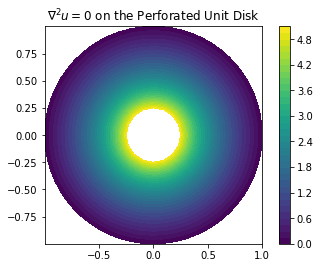

In [59]:
p = plot(sol)
plt.title(r'$∇ ^2 u = 0$ on the Perforated Unit Disk')
plt.colorbar(p)
plt.show()